# Unsupervised Learning

Unsupervised learning is a type of machine learning where the goal is to find patterns or relationships in a dataset without explicit labels or guidance from a teacher. Unlike supervised learning, there is no target variable to predict, and the algorithm must instead identify patterns and relationships on its own.

### Course Book Information
For more information on unsupervised learning and clustering, refer to Chapter 9 of the course book. This chapter covers the basics of unsupervised learning, including clustering algorithms such as k-means and hierarchical clustering.



## Clustering
Clustering is a type of unsupervised learning where the goal is to group similar data points together into clusters based on some similarity metric or distance function. The algorithm does not have prior knowledge of the number of clusters, and it must discover them on its own.

First, let's prepare the dataset.

In [84]:
import numpy as np
import pandas as pd

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.style.use("dark_background")

In [86]:
def get_features(n_clus=5, random_state=42, thr=2.0, N=500, lvl=0.45):
  X_c = []
  n = 0
  while n < n_clus:
    if n == 0:
      X_c.append(np.random.rand(2)*6-3)
      n = n+1
    else:
      insert = False
      while insert is False:
        insert = True
        x_p = np.random.rand(2)*6-3
        for i, x in enumerate(X_c):
          d = np.linalg.norm(x - x_p)
          if d < thr:
            insert = False
            break
      X_c.append(x_p)
      n = n+1
    
  radii = np.random.rand(N)*thr*lvl
  thetas = np.random.rand(N)*np.pi*2
  idx = np.random.randint(0, n_clus, N)
  shf = np.array([X_c[i] for i in idx])
  pos = np.array([radii * np.cos(thetas), radii * np.sin(thetas)]).T
  X = shf + pos
  return np.array(X_c), X

X_c, X = get_features()

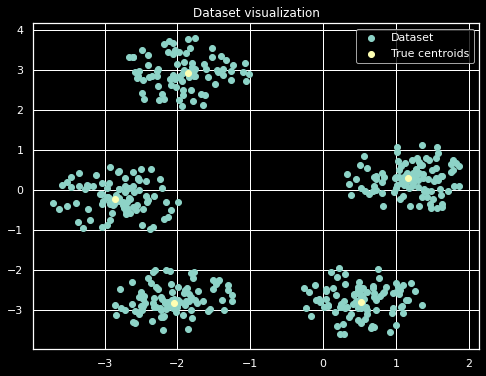

In [87]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(X.T[0], X.T[1], label="Dataset")
ax.scatter(X_c.T[0], X_c.T[1], label="True centroids")
ax.set_title("Dataset visualization")
ax.legend()

fig.show()

### DBSCAN Algorithm
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together data points that are close to each other based on a density criterion. Unlike the KMeans algorithm, DBSCAN does not require the number of clusters to be specified beforehand and can discover clusters of different shapes and sizes.

Parameters:
* Minimum samples (“MinPts”): the fewest number of points required to form a cluster
* ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster


The algorithm works as follows:

1. Choose an arbitrary unvisited data point and determine its neighborhood of other data points within a radius epsilon.
2. If the number of data points within the epsilon radius is greater than or equal to the minimum number of points required to form a cluster, then create a new cluster and add all the data points within the epsilon radius to the cluster.
3. Expand the cluster by iterating through all of the neighboring data points within the epsilon radius and adding any unvisited points to the cluster.
4. Repeat steps 1-3 until all data points have been visited.

The DBSCAN algorithm can identify noise points, which are points that do not belong to any cluster. The algorithm can also identify border points, which are points that are within the epsilon radius of a cluster but are not density-reachable by any other cluster.

DBSCAN has several advantages over KMeans, such as being able to handle clusters of different sizes and shapes and being less sensitive to initial conditions. However, it has some limitations, such as being sensitive to the choice of hyperparameters and struggling with high-dimensional datasets.

Overall, DBSCAN is a powerful clustering algorithm that can provide valuable insights into the structure of a dataset and is commonly used in a variety of applications, such as anomaly detection and image segmentation.

<Axes: xlabel='x1', ylabel='x2'>

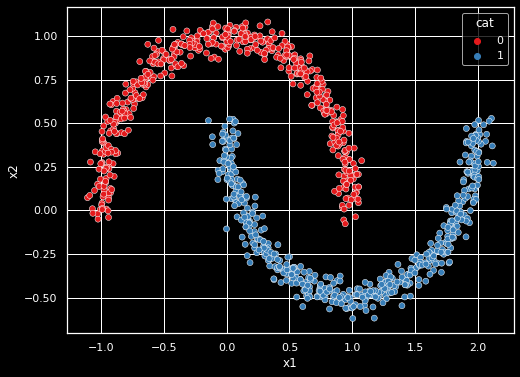

In [88]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

fig, ax = plt.subplots(figsize=(8,6))

df = pd.DataFrame(X, columns=['x1', 'x2'])
df['cat'] = y

sns.scatterplot(data=df, x='x1', y='x2', hue='cat', palette='Set1')

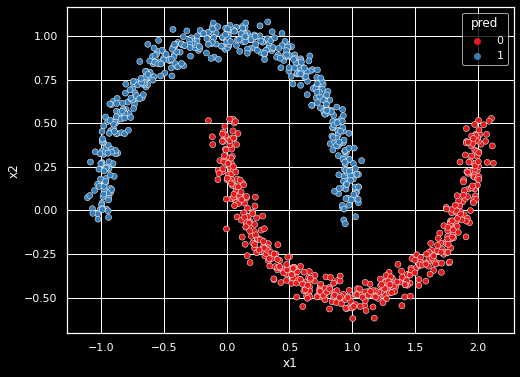

In [89]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=2)
# eps=0.005, min_samples=10
# eps=0.01, min_samples=3
# eps=0.01, min_samples=5
# eps=0.1, min_samples=2
# eps=0.2, min_samples=2

dbscan.fit(X)

df['pred'] = dbscan.labels_

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df, x='x1', y='x2', hue='pred', palette='Set1', ax=ax)
fig.show()

... best idea is to use your eyes.

## When to use DBSCAN
When should you use DBSCAN over another clustering algorithm? Here are some examples of scenarios where you should use DBSCAN.

* You suspect there may be **irregularly** shaped clusters. If you have reason to expect that the clusters in your dataset may be irregularly shaped, DBSCAN is a great option. DBSCAN will be able to identify clusters that are spherical or ellipsoidal as well as clusters that have more irregular shapes.
* Data has **outliers**. DBSCAN is also a great option for cases where there are many outliers in your dataset. DBSCAN is able to detect outlying data point that do not belong to any clusters and exclude those data points from the the clusters.
* **Anomaly** detection. Since DBSCAN automatically detects outliers and excludes them from all clusters, DBSCAN is also a good option in cases where you want to be able to detect outliers in your dataset.

## When not to use DBSCAN
When should you avoid using DBSCAN? Here are some examples of scenarios where you should avoid using DBSCAN.

* **No drop in density between clusters**. In general, DBSCAN requires there to be a drop in the density of data points in order to detect boundaries between clusters. That means that you should not use DBSCAN if you do not expect there to be much of a drop in density between different clusters. For example, if you expect many of your clusters overlap, multiple clusters might get grouped together into one large cluster.
* **Many categorical features**. DBSCAN is generally intended to be used in scenarios where the majority of your features are numeric. That means that you should avoid using DBSCAN in cases where you have many categorial features. In these scenarios, you may be better off using hierarchical clustering with an appropriate distance metric or an extension of k-means clustering like k-modes to k-prototypes.

*source: https://crunchingthedata.com/when-to-use-dbscan/*

# Dealing with imbalanced datasets: Credit Fraud Dataset

## Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


*source: https://www.openml.org/*

## Code

### Import libraries

In [111]:
import os
import urllib
import pandas as pd
from scipy.io import arff

from google.colab import drive

drive.mount('/content/drive')

mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['lines.markerfacecolor'] = "#FFFFFF"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Download the dataset

In [91]:
url = "https://www.openml.org/data/download/21756045/dataset"

file_name = "data.arff"
urllib.request.urlretrieve(url, file_name)

data = arff.loadarff(file_name)
df_fraud = pd.DataFrame(data[0])

### EDA

#### 1. Header

In [112]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


* `time`: time in seconds since the first transaction
* `V1`...`V28`: component of the dataset after PCA (to preserve the privacy of the customers)
* `Amout`: transaction amount in dollars
* `Class`: Non-fraud (0), fraud (1)

#### 2. Description

In [113]:
df_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


#### 3. NaNs and 4. Duplicates 

In [114]:
print("NaNs:")
display(df_fraud.isnull().sum())
print("\n\nDuplicates:")
display(df_fraud.duplicated().sum())

NaNs:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



Duplicates:


0

No NaNs. Good! But there are a lot of duplicates though

In [115]:
# Drop duplicates
df_fraud.drop_duplicates(inplace=True)

#### 5. Distributions of the target class

In [116]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', df_fraud['Class'].value_counts()[0], ',', round(df_fraud['Class'].value_counts()[0]/len(df_fraud) * 100,2), '% of the dataset')
print('Frauds', df_fraud['Class'].value_counts()[1], ',', round(df_fraud['Class'].value_counts()[1]/len(df_fraud) * 100,2), '% of the dataset')


No Frauds 283253 , 99.83 % of the dataset
Frauds 473 , 0.17 % of the dataset


Observe the imbalance in our initial dataset, with the majority of transactions being non-fraudulent. If we utilize this dataframe as the foundation for our predictive models and analysis, we are likely to encounter numerous inaccuracies, and our algorithms may overfit by presuming that the majority of transactions are not fraudulent. Our objective is not for the model to assume but instead, to identify patterns that indicate potential fraud.

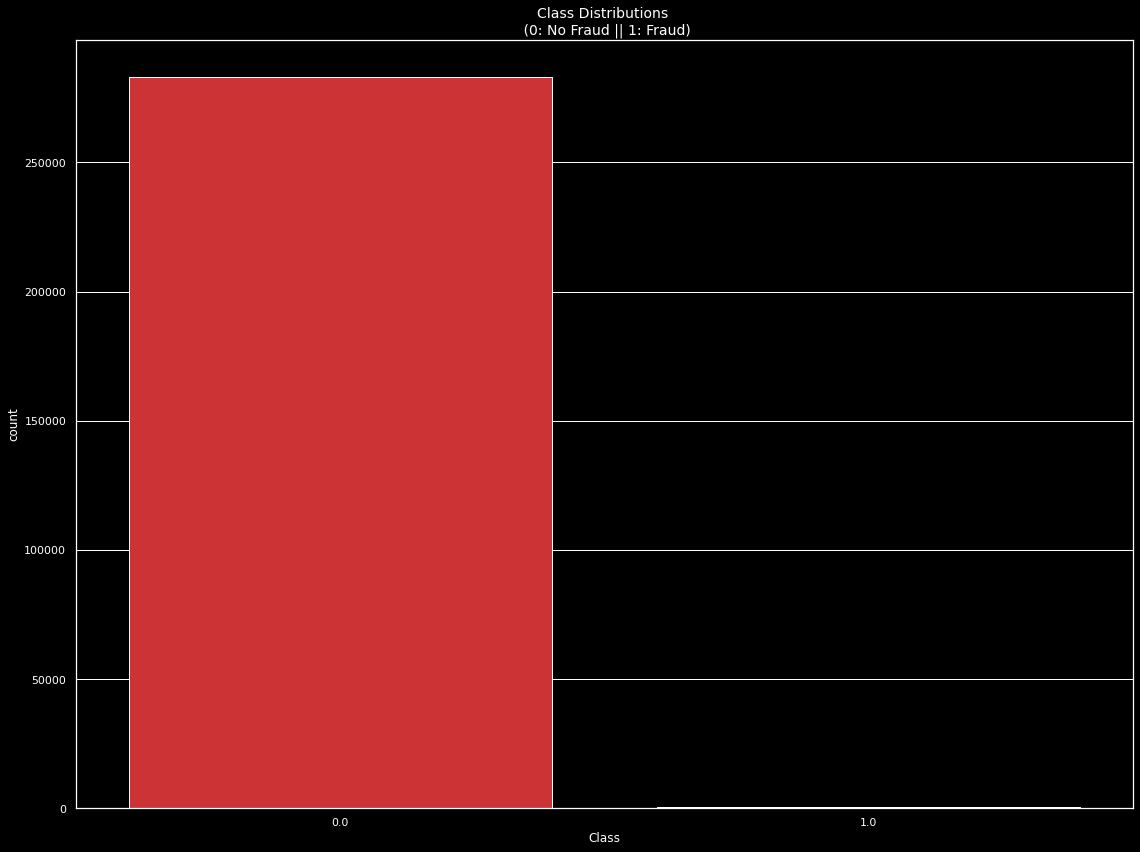

In [117]:
fig, ax = plt.subplots()
sns.countplot(x = 'Class', data=df_fraud, palette='Set1', ax=ax)
ax.set_title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

fig.tight_layout()
fig.show()

#### Sub-sampling
To aid our algorithms in identifying patterns that determine whether a transaction is fraudulent or not, we need to generate a sub-sample of the dataframe with an equivalent number of Fraud and Non-Fraud cases.

#### What is a sub-sample?
A sub-sample, in this case, will be a dataframe with an even 50/50 distribution of fraudulent and non-fraudulent transactions, thus resulting in an equal number of both.

#### Why create a sub-sample?
As previously noted in this notebook, the original dataframe was heavily imbalanced. Utilizing the original dataframe would result in the following issues:

* **Overfitting**: Our classification models may assume that most transactions are non-fraudulent, leading to potential overfitting. Instead, we desire our model to accurately identify when fraud occurs.
* **Incorrect Correlations**: While the meaning of the "V" features is unknown, understanding how each feature influences the outcome (fraud or non-fraud) is essential. An imbalanced dataframe obscures the true correlations between the class and features.

#### Robust Scaler
Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

*source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html*

In [118]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df = df_fraud.copy() # Never edit the original DataFrame

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

# Inserting the columns in the first positions
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


#### Data Splitting (Original DataFrame)

Prior to implementing the Random UnderSampling technique, it is necessary to split the original dataframe. Why? This allows for testing purposes. Although the data is divided when employing the Random UnderSampling or OverSampling techniques, we must test our models on the original testing set rather than the one created by either technique. The primary objective is to fit the model with the undersampled and oversampled dataframes (in order to detect patterns) and subsequently assess its performance on the original testing set.

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels
## Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

## See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain), f"Train length: {len(original_Xtrain)}")
print(test_counts_label/ len(original_ytest), f"Test length: {len(original_Xtest)}")


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 50120 231099 144015 ... 241772  60347  66795] Test: [ 73289  17008 201858 ...  70428 240345  72924]
Train: [202209 151239   3326 ... 196834 194511 226127] Test: [183631   3243 278563 ...  36756 139202 269941]
Train: [ 56446  62943  73711 ...  12631 163147 203162] Test: [277397 226956  72744 ... 246176 126676 150965]
Train: [ 33101  88336 211860 ...  79468 203689 156721] Test: [ 80652 243862 115037 ... 139496 171579 283616]
Train: [282669  74339 125048 ...  93217 210884 197796] Test: [146502   3483 181314 ... 113129  67032 258630]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99833172 0.00166828] Train length: 255353
[0.9983435 0.0016565] Test length: 28373


In [120]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 473 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:473]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
157918,8.525935,0.304660,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,...,-0.038314,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,1.0
157585,-0.292032,0.298431,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,...,-0.344452,-0.173602,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1.0
132513,6.175497,-0.054969,-1.423201,-0.888180,1.963786,-0.136290,-2.046648,0.510147,1.595701,0.056360,...,0.979210,0.081977,-0.427361,0.885698,0.390007,0.207413,0.963477,-0.161743,0.094183,0.0
237107,-0.305938,0.756858,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,...,0.336442,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,1.0
8617,-0.292032,-0.858558,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,...,0.535435,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.0


Distribution of the Classes in the subsample dataset
1.0    0.5
0.0    0.5
Name: Class, dtype: float64


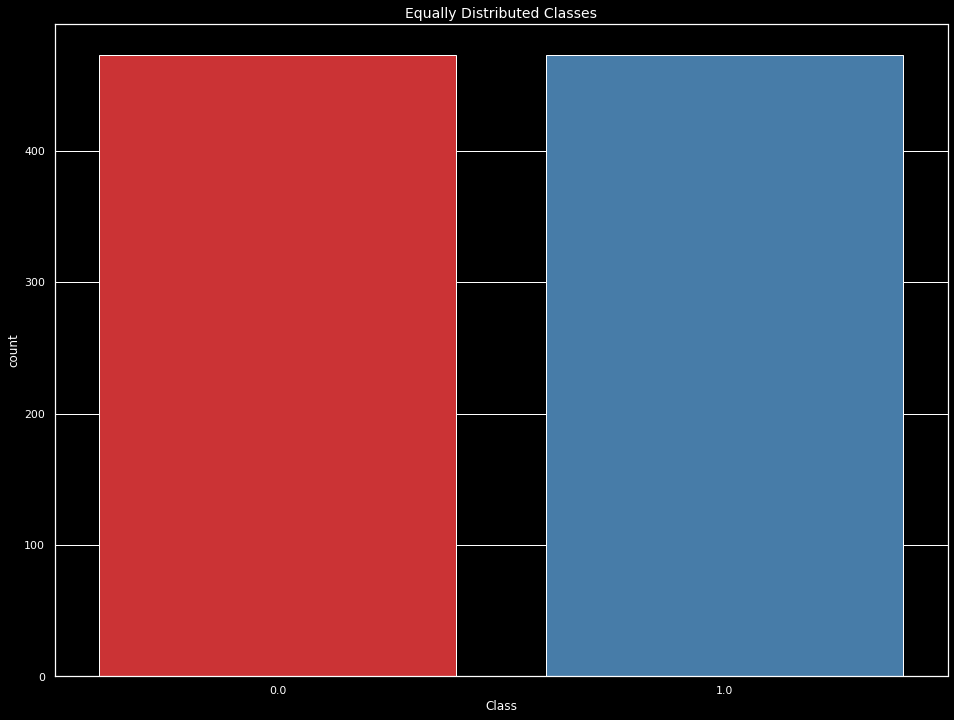

In [121]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x = 'Class', data=new_df, palette='Set1')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


#### 5. Correlations

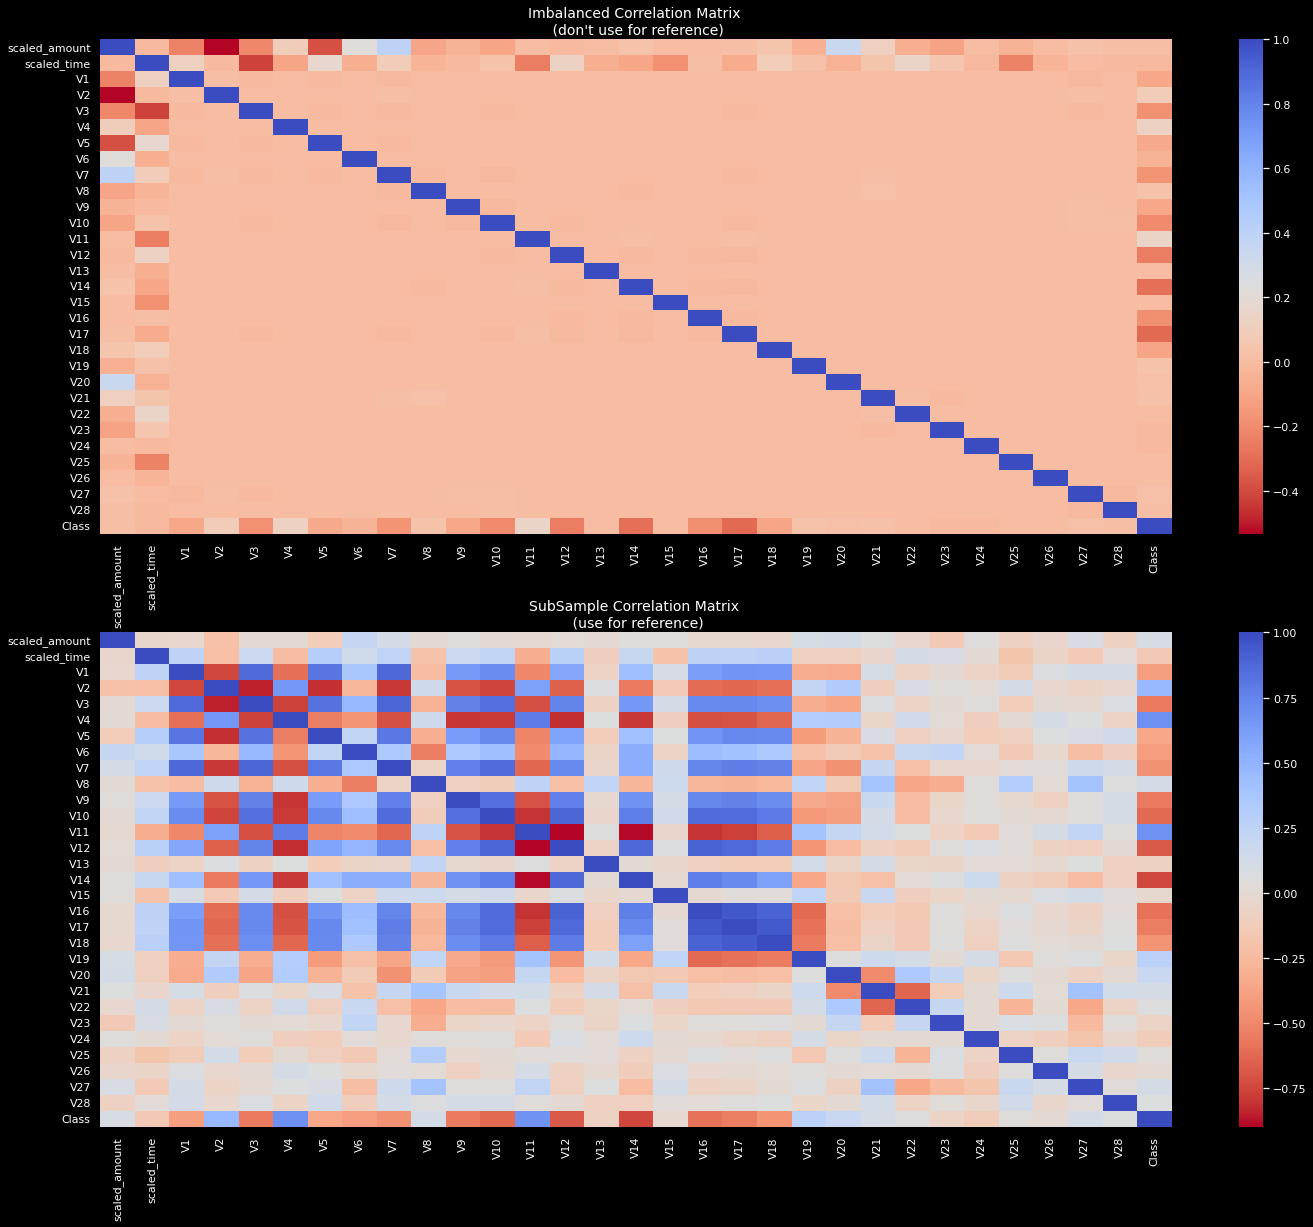

In [122]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

#### Negative and Positive Correlations

We have identified negative correlations between V17, V14, V12, and V10, whereby the lower these values are, the more probable it is that the transaction will be fraudulent. On the other hand, V2, V4, V11, and V19 display positive correlations, with higher values increasing the likelihood of a fraudulent transaction.

#### Boxplots

To further comprehend the distribution of these features in fraudulent and non-fraudulent transactions, we will utilize boxplots.





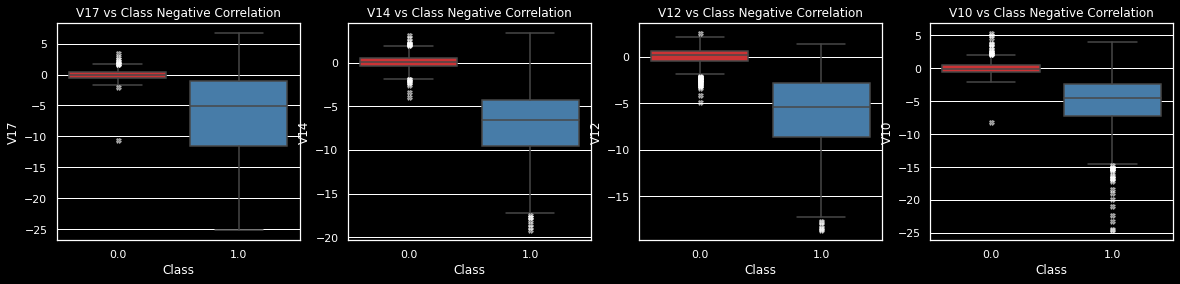

In [136]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

flierprops = dict(marker='X', markerfacecolor='#FFFFFF', markersize=5,
                  linestyle='none', markeredgecolor='w', alpha=0.5)
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette='Set1', ax=axes[0], flierprops=flierprops)
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette='Set1', ax=axes[1], flierprops=flierprops)
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette='Set1', ax=axes[2], flierprops=flierprops)
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette='Set1', ax=axes[3], flierprops=flierprops)
axes[3].set_title('V10 vs Class Negative Correlation')

f.show()

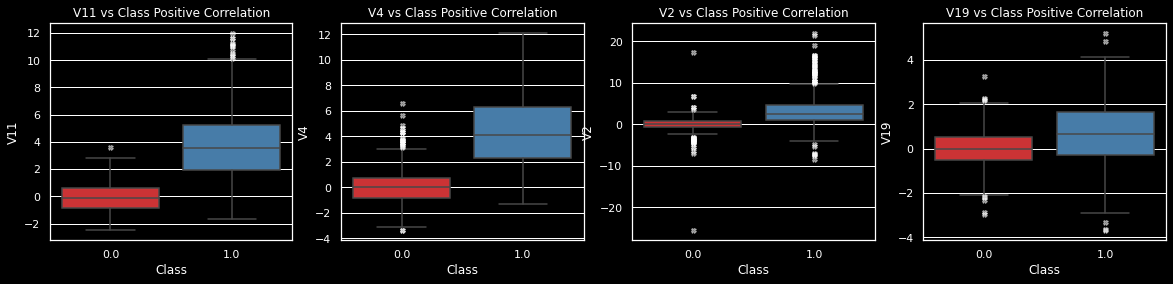

In [137]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette='Set1', ax=axes[0], flierprops=flierprops)
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette='Set1', ax=axes[1], flierprops=flierprops)
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette='Set1', ax=axes[2], flierprops=flierprops)
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette='Set1', ax=axes[3], flierprops=flierprops)
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

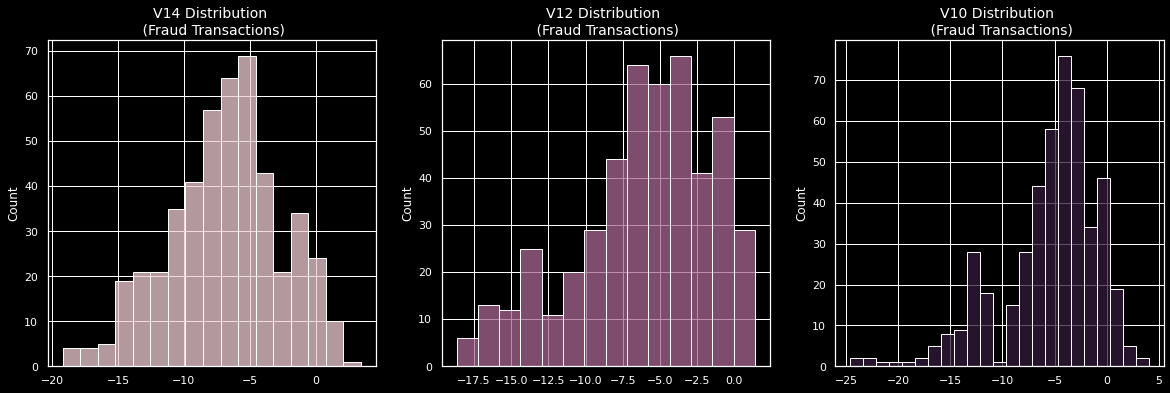

In [125]:
from scipy.stats import norm
from matplotlib.colors import to_hex

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
cols = sns.color_palette('ch:s=.2,rot=.25', n_colors=3)

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist,ax=ax1, color=to_hex(cols[0]))
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist,ax=ax2, color=to_hex(cols[1]))
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist,ax=ax3, color=to_hex(cols[2]))
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

f.show()


In [126]:
 # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)

new_df_no_out = new_df.copy()
v14_fraud = new_df_no_out['V14'].loc[new_df_no_out['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df_no_out = new_df_no_out.drop(new_df_no_out[(new_df_no_out['V14'] > v14_upper) | (new_df_no_out['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df_no_out['V12'].loc[new_df_no_out['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df_no_out = new_df_no_out.drop(new_df_no_out[(new_df_no_out['V12'] > v12_upper) | (new_df_no_out['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df_no_out)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df_no_out['V10'].loc[new_df_no_out['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df_no_out = new_df_no_out.drop(new_df_no_out[(new_df_no_out['V10'] > v10_upper) | (new_df_no_out['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df_no_out)))


Quartile 25: -9.50514082568186 | Quartile 75: -4.25246559869278
iqr: 5.25267522698908
Cut Off: 7.87901284048362
V14 Lower: -17.38415366616548
V14 Upper: 3.62654724179084
Feature V14 Outliers for Fraud Cases: 7
V10 outliers:[-18.049997689859396, -19.2143254902614, -17.6206343516773, -18.4937733551053, -17.7216383537133, -17.4759212828566, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.971245282033493
V12 Upper: 5.6720715694851185
V12 outliers: [-17.003289445516, -18.4311310279993, -18.047596570821604, -17.1504052507291, -18.553697009645802, -17.1829184301947, -18.683714633344298]
Feature V12 Outliers for Fraud Cases: 7
Number of Instances after outliers removal: 932
------------------------------------------------------------------------------------------------------------------------------------------------------------------

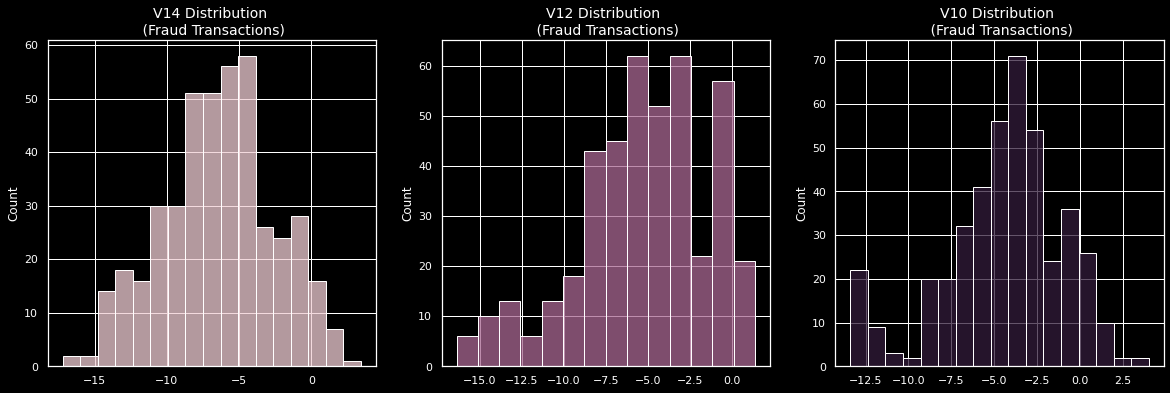

In [127]:
from scipy.stats import norm
from matplotlib.colors import to_hex

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
cols = sns.color_palette('ch:s=.2,rot=.25', n_colors=3)

v14_fraud_dist = new_df_no_out['V14'].loc[new_df_no_out['Class'] == 1].values
sns.histplot(v14_fraud_dist,ax=ax1, color=to_hex(cols[0]))
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df_no_out['V12'].loc[new_df_no_out['Class'] == 1].values
sns.histplot(v12_fraud_dist,ax=ax2, color=to_hex(cols[1]))
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df_no_out['V10'].loc[new_df_no_out['Class'] == 1].values
sns.histplot(v10_fraud_dist,ax=ax3, color=to_hex(cols[2]))
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

f.show()
